In [1]:
# Import Libraries, Read Data, Drop nan
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

crime_df_raw = pd.read_csv('data/crimes.csv')
crime_df_raw.dropna(inplace=True);

In [2]:
# Get Data Set, Create Month and Day Columns, Apply Date Index
crime_df = crime_df_raw.copy()

crime_df['Month'] = pd.to_datetime(crime_df['Date']).dt.month
crime_df['Day'] = pd.to_datetime(crime_df['Date']).dt.day
#crime_df = crime_df[ crime_df['Month'] == 1]
crime_df.index = pd.to_datetime(crime_df['Date'])
print(crime_df.shape)

(6074844, 24)


[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018]


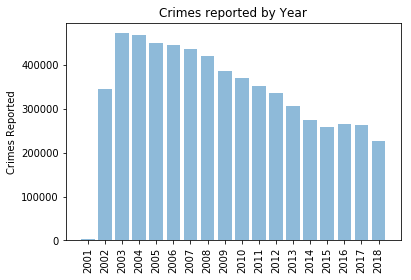

In [3]:
years = crime_df['Year'].unique()
years.sort(axis=0)
print(years)
y_pos = np.arange(len(years))
row_counts = []
for y in years:
    count = crime_df[ crime_df['Year'] == y].shape[0]
    row_counts.append(count)
plt.bar(y_pos, row_counts, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Crimes Reported')
plt.title('Crimes reported by Year')
plt.xticks(rotation=90)
plt.show()


['BATTERY' 'OTHER OFFENSE' 'ROBBERY' 'NARCOTICS' 'CRIMINAL DAMAGE'
 'WEAPONS VIOLATION' 'THEFT' 'BURGLARY' 'MOTOR VEHICLE THEFT'
 'PUBLIC PEACE VIOLATION' 'ASSAULT' 'CRIMINAL TRESPASS'
 'CRIM SEXUAL ASSAULT' 'INTERFERENCE WITH PUBLIC OFFICER' 'ARSON'
 'DECEPTIVE PRACTICE' 'LIQUOR LAW VIOLATION' 'KIDNAPPING' 'SEX OFFENSE'
 'OFFENSE INVOLVING CHILDREN' 'PROSTITUTION' 'HOMICIDE' 'GAMBLING'
 'INTIMIDATION' 'STALKING' 'OBSCENITY' 'PUBLIC INDECENCY'
 'HUMAN TRAFFICKING' 'CONCEALED CARRY LICENSE VIOLATION'
 'OTHER NARCOTIC VIOLATION' 'NON - CRIMINAL' 'NON-CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'RITUALISM']


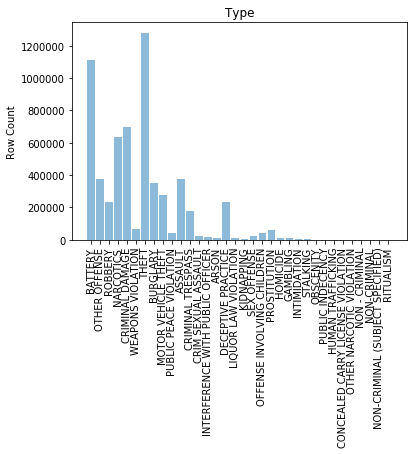

In [4]:
# Crime breakdown by Crime Type

crime_types = crime_df['Primary Type'].unique()
print(crime_types)
y_pos_types = np.arange(len(crime_types))
counts_types = []
for t in crime_types:
    count = crime_df[ crime_df['Primary Type'] == t].shape[0]
    counts_types.append(count)
plt.bar(y_pos_types, counts_types, align='center', alpha=0.5)
plt.xticks(y_pos_types, crime_types)
plt.ylabel('Row Count')
plt.title('Type')
plt.xticks(rotation=90)
plt.show()

[11.  7.  2.  9.  5.  6.  4. 12. 15. 14. 20. 10. 22.  8. 17.  3. 18. 16.
 25.  1. 24. 19. 31. 21.]


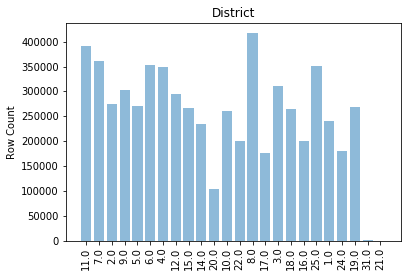

In [5]:
# Crime breakdown by District

districts = crime_df['District'].unique()
print(districts)
y_pos_areas = np.arange(len(districts))
counts_districts = []
for t in districts:
    count = crime_df[ crime_df['District'] == t].shape[0]
    counts_districts.append(count)
plt.bar(y_pos_areas, counts_districts, align='center', alpha=0.5)
plt.xticks(y_pos_areas, districts)
plt.ylabel('Row Count')
plt.title('District')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Create Train and Test Data

train = crime_df[crime_df['Year'] < 2017].resample('D').apply({'Date': 'count'})
test = crime_df[crime_df['Year'] > 2016].resample('D').apply({'Date': 'count'})

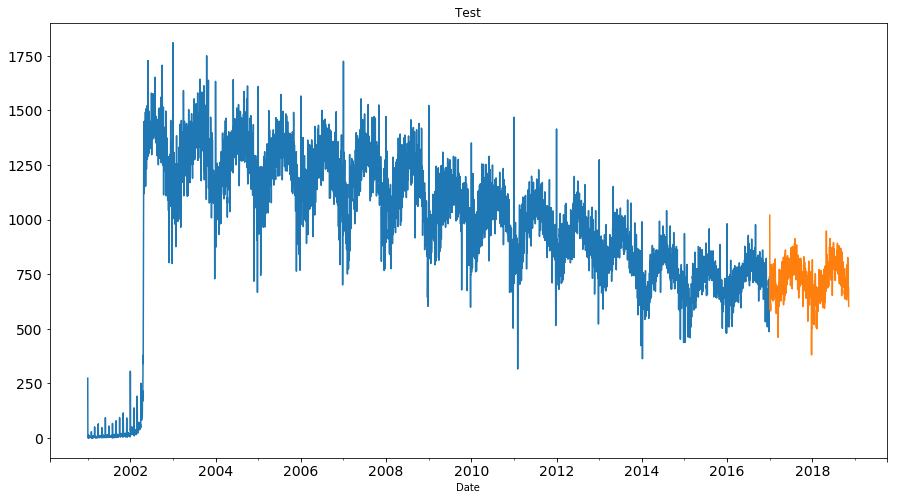

In [8]:
train.Date.plot(figsize=(15, 8), title='Train', fontsize=14)
test.Date.plot(figsize=(15, 8), title='Test', fontsize=14)
plt.show()

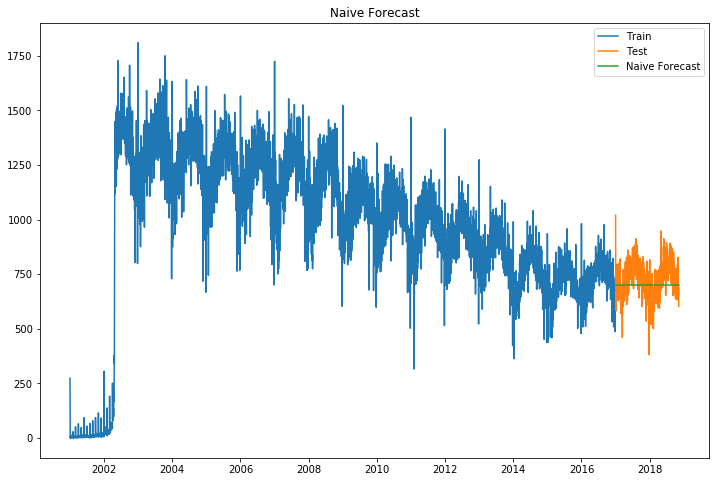

81.96466796542533


In [9]:
# Forecast (Naive)

dd = np.asarray(train.Date)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]

plt.figure(figsize=(12, 8))
plt.plot(train.index, train['Date'], label='Train')
plt.plot(test.index, test['Date'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()
rms_naive = sqrt(mean_squared_error(test.Date, y_hat.naive))
print(rms_naive)

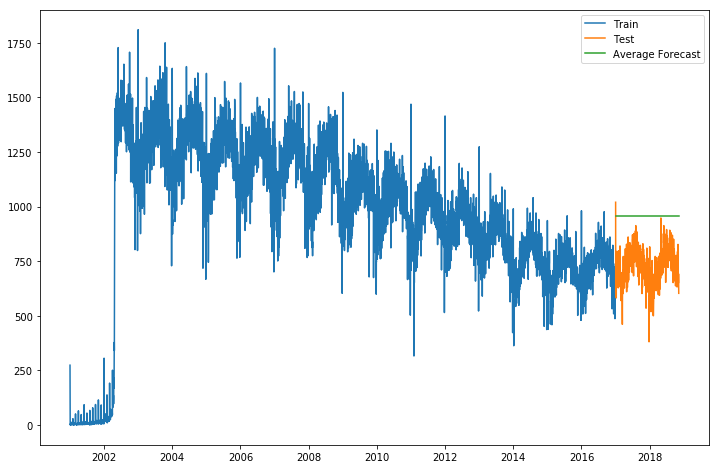

243.93893360004492


In [10]:
# Forecast (Simple Average)

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train.Date.mean()

plt.figure(figsize=(12, 8))
plt.plot(train.Date, label='Train')
plt.plot(test.Date, label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()
rms_simple_average = sqrt(mean_squared_error(test.Date, y_hat_avg.avg_forecast))
print(rms_simple_average)

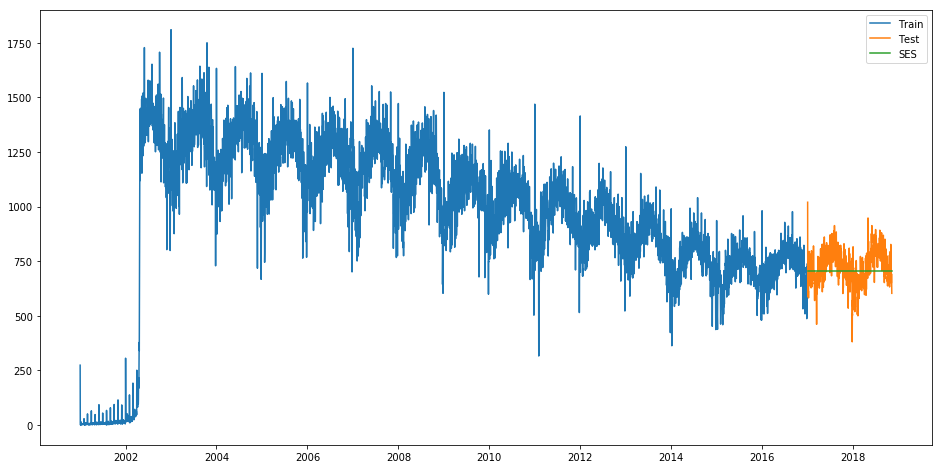

81.38737621062185


In [11]:
# Forecase (Exponential Smoothing)
y_hat_avg_es = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train.Date)).fit(smoothing_level=0.6, optimized=False)
y_hat_avg_es['SES'] = fit2.forecast(len(test))

plt.figure(figsize=(16, 8))
plt.plot(train.Date, label='Train')
plt.plot(test.Date, label='Test')
plt.plot(y_hat_avg_es['SES'], label='SES')
plt.legend(loc='best')
plt.show()
rms_es = sqrt(mean_squared_error(test.Date, y_hat_avg_es.SES))
print(rms_es)